In [1]:
from utils import *
import pandas as pd
from sklearn.datasets import make_friedman1, make_friedman2, make_friedman3
plt.style.use('seaborn-muted')
plt.rc('font', size=16, family='serif')
plt.rc('mathtext', default='it', fontset='cm')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [7]:
depths=(2,3,10)
arrays = [
    # ['Parametric'], 
    ['Ackley', 'Franke', 'Nonpoly'],
    #, 'Friedman 1', 'Friedman 2', 'Friedman 3'],
    [False, True],  # Noise
]

index = pd.MultiIndex.from_product(
    arrays, names=["Dataset", "Noise"])


df_gaus_rd = pd.DataFrame(
    index=index,
    columns=[f'D{depths[0]}rmse', f'D{depths[1]}rmse',  f'D{depths[2]}rmse', f'D{depths[0]}corr', f'D{depths[1]}corr', f'D{depths[2]}corr'])

df_gaus_sd = pd.DataFrame(
    index=index,
    columns=[f'D{depths[0]}rmse', f'D{depths[1]}rmse',  f'D{depths[2]}rmse', f'D{depths[0]}corr', f'D{depths[1]}corr', f'D{depths[2]}corr'])

df_lap_rd = pd.DataFrame(
    index=index,
    columns=[f'D{depths[0]}rmse', f'D{depths[1]}rmse',  f'D{depths[2]}rmse', f'D{depths[0]}corr', f'D{depths[1]}corr', f'D{depths[2]}corr'])

df_lap_sd = pd.DataFrame(
    index=index,
    columns=[f'D{depths[0]}rmse', f'D{depths[1]}rmse',  f'D{depths[2]}rmse', f'D{depths[0]}corr', f'D{depths[1]}corr', f'D{depths[2]}corr'])

# Datasets

In [8]:
datasets = []
# [X_train, y_train, X_test, y_test, norm, noise, name]

## Parametric

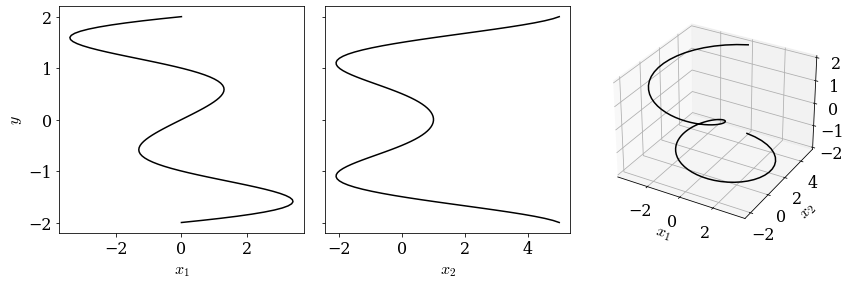

In [21]:
name = 'Parametric'
np.random.seed(12435908)
noise = 0.15

linear = np.linspace(0, 99, 100, dtype=int)
train_index = np.sort(np.random.choice(linear, 50, replace=False))
test_index = np.delete(linear, train_index)

z = np.linspace(-2, 2, 100)
t = np.linspace(-2*np.pi, 2*np.pi, 100)
x = (z**2 + 1) * np.sin(t)
y = (z**2 + 1) * np.cos(t)

X, y, y_noisy = np.column_stack((x,y)), z.reshape(-1,1), np.random.normal(z, scale=noise).reshape(-1,1)

X_train, y_train, y_train_noisy = X[train_index], y[train_index], y_noisy[train_index]
X_norm_train = normalize(X_train, axis=1)

X_test, y_test, y_test_noisy = X[test_index], y[test_index], y_noisy[test_index]
X_norm_test = normalize(X_test, axis=1)

# [X_train, y_train, X_test, y_test, X_draw, norm, noise, name]
datasets.append([X_train, y_train, X_test, y_test, X_test, False, 0.0, name])
datasets.append([X_norm_train, y_train, X_norm_test, y_test, X_test, True, 0.0, name])
datasets.append([X_train, y_train_noisy, X_test, y_test_noisy, X_test, False, 0.15, name])
datasets.append([X_norm_train, y_train_noisy, X_norm_test, y_test_noisy, X_test, True, 0.15, name])

# fig, ax = plot((X, X_train), (y.ravel(), y_train_noisy), typ='data', title=r"$z = f(x, y)$", figsize=(8, 2.5))

fig, ax = plt.subplots(nrows=1, ncols=3, figsize = (12,4.25), sharey=True)
ax[2].remove()
ax[2] = plt.subplot(1,3,3,projection='3d')
ax[2].patch.set_alpha(0)
ax[2].plot(X[:,0], X[:,1], y.ravel(), c='black')
# ax[2].scatter(X[:,0], X[:,1], y_noisy, c=y_noisy, cmap='plasma', alpha=.9)
ax[2].set_xlabel(r'$x_1$')
ax[2].set_ylabel(r'$x_2$')

ax[0].plot(X[:,0], y.ravel(), c='black', zorder=0)
# ax[1].scatter(X[:,0], y_noisy, c=y_noisy, alpha=.7, cmap='plasma')
ax[0].set_xlabel(r'$x_1$')
ax[0].set_ylabel(r'$y$')
# ax[1].set_ylabel('z')

ax[1].plot(X[:,1], y.ravel(), c='black', zorder=0)
# ax[0].scatter(X[:,1], y_noisy, c=y_noisy, alpha=.7, cmap='plasma')
ax[1].set_xlabel(r'$x_2$')
fig.tight_layout()

In [22]:
fig.savefig('./exp/parametric/dataset.svg')

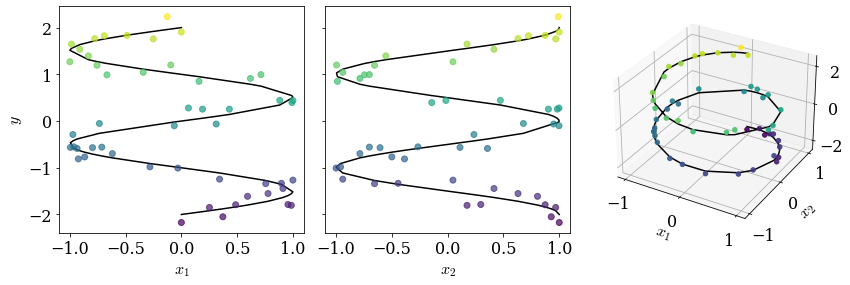

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize = (12,4.25), sharey=True)
ax[2].remove()
ax[2] = plt.subplot(1,3,3,projection='3d')
ax[2].patch.set_alpha(0)
ax[2].plot(X_norm_train[:,0], X_norm_train[:,1], y_train.ravel(), c='black')
ax[2].scatter(X_norm_train[:,0], X_norm_train[:,1], y_train_noisy, c=y_train_noisy, alpha=.9)# cmap='plasma', alpha=.9)
ax[2].set_xlabel(r'$x_1$')
ax[2].set_ylabel(r'$x_2$')

ax[0].plot(X_norm_train[:,0], y_train.ravel(), c='black', zorder=0)
ax[0].scatter(X_norm_train[:,0], y_train_noisy, c=y_train_noisy, alpha=.7)#, cmap='plasma')
ax[0].set_xlabel(r'$x_1$')
ax[0].set_ylabel(r'$y$')
# ax[1].set_ylabel('z')

ax[1].plot(X_norm_train[:,1], y_train.ravel(), c='black', zorder=0)
ax[1].scatter(X_norm_train[:,1], y_train_noisy, c=y_train_noisy, alpha=.7)#, cmap='plasma')
ax[1].set_xlabel(r'$x_2$')
fig.tight_layout()

In [20]:
fig.savefig('./exp/parametric/dataset_norm.svg')

## Ackley

In [9]:
X_train = None
X_norm_train = None
y_train = None
y_train_noisy = None
X_test = None
X_norm_test = None
y_test = None 
y_test_noisy = None

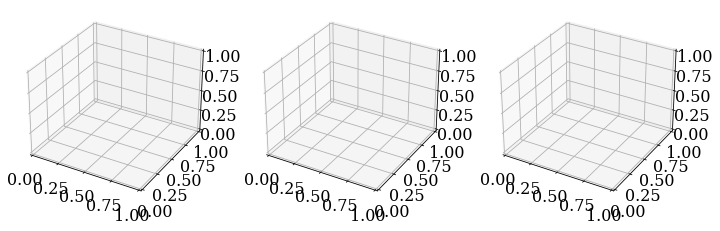

In [10]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(12,4), subplot_kw={'projection': '3d'})
ax = ax.ravel()
for a in ax:
    a.patch.set_alpha(0)

In [11]:
name = 'Ackley'
noise = 0.75

lh = qmc.LatinHypercube(2, seed=23548709)
smpl1 = lh.random(400)
smpl1 = qmc.scale(smpl1, (1,1), (7,7))
X1 = smpl1[:,0]
Y1 = smpl1[:,1]
smpl2 = lh.random(400)
smpl2 = qmc.scale(smpl2, (1,1), (7,7))
X2 = smpl2[:,0]
Y2 = smpl2[:,1]
   
Z1 = -20*np.exp(-0.2 * np.sqrt(0.5*(X1**2 + Y1**2))) - np.exp(0.5 *(np.cos(2*np.pi*X1) + np.cos(2*np.pi*Y1))) + np.e + 20
Z2 = -20*np.exp(-0.2 * np.sqrt(0.5*(X2**2 + Y2**2))) - np.exp(0.5 *(np.cos(2*np.pi*X2) + np.cos(2*np.pi*Y2))) + np.e + 20

bigX1 = np.stack((X1,Y1), axis=1)
smolY1 = Z1.reshape(-1,1)
bigX2 = np.stack((X2,Y2), axis=1)
smolY2 = Z2.reshape(-1,1)

X_train, y_train, y_train_noisy = bigX1, smolY1, np.random.normal(smolY1, scale=noise).reshape(-1,1)
X_norm_train = normalize(X_train, axis=1)

X_test, y_test, y_test_noisy = bigX2, smolY2, np.random.normal(smolY2, scale=noise).reshape(-1,1)
X_norm_test = normalize(X_test, axis=1)

# [X_train, y_train, X_test, y_test, X_draw, norm, noise, name]
datasets.append([X_train, y_train, X_test, y_test, X_test, False, 0.0, name])
datasets.append([X_norm_train, y_train, X_norm_test, y_test, X_test, True, 0.0, name])
datasets.append([X_train, y_train_noisy, X_test, y_test_noisy, X_test, False, 0.75, name])
datasets.append([X_norm_train, y_train_noisy, X_norm_test, y_test_noisy, X_test, True, 0.75, name])

ax[0].plot_trisurf(X1,Y1,Z1, cmap='viridis')
ax[0].set_title(name)

Text(0.5, 0.92, 'Ackley')

## Franke

In [12]:
X_train = None
X_norm_train = None
y_train = None
y_train_noisy = None
X_test = None
X_norm_test = None
y_test = None 
y_test_noisy = None

In [13]:
name = 'Franke'
noise = 0.1

lh = qmc.LatinHypercube(2, seed=23548709)
smpl1 = lh.random(400)
smpl1 = qmc.scale(smpl1, (-0.5,-0.5), (1,1))
X1 = smpl1[:,0]
Y1 = smpl1[:,1]
smpl2 = lh.random(400)
smpl2 = qmc.scale(smpl2, (-0.5,-0.5), (1,1))
X2 = smpl2[:,0]
Y2 = smpl2[:,1]

Z1 = (0.75*np.exp(- (9*X1 - 2)**2/4 - (9*Y1 - 2)**2/4) + 
        0.75*np.exp(- (9*X1 + 1)**2/49 - (9*Y1 + 1)/10) +
        0.5*np.exp(- (9*X1 - 7)**2/4  - (9*Y1 - 3)**2/4) +
        0.2*np.exp(- (9*X1 - 4)**2    - (9*Y1 - 7)**2))
Z2 = (0.75*np.exp(- (9*X2 - 2)**2/4 - (9*Y2 - 2)**2/4) + 
        0.75*np.exp(- (9*X2 + 1)**2/49 - (9*Y2 + 1)/10) +
        0.5*np.exp(- (9*X2 - 7)**2/4  - (9*Y2 - 3)**2/4) +
        0.2*np.exp(- (9*X2 - 4)**2    - (9*Y2 - 7)**2))

bigX1 = np.stack((X1,Y1), axis=1)
smolY1 = Z1.reshape(-1,1)
bigX2 = np.stack((X2,Y2), axis=1)
smolY2 = Z2.reshape(-1,1)

X_train, y_train, y_train_noisy = bigX1, smolY1, np.random.normal(smolY1, scale=noise).reshape(-1,1)
X_norm_train = normalize(X_train, axis=1)

X_test, y_test, y_test_noisy = bigX2, smolY2, np.random.normal(smolY2, scale=noise).reshape(-1,1)
X_norm_test = normalize(X_test, axis=1)

# [X_train, y_train, X_test, y_test, X_draw, norm, noise, name]
datasets.append([X_train, y_train, X_test, y_test, X_test, False, 0.0, name])
datasets.append([X_norm_train, y_train, X_norm_test, y_test, X_test, True, 0.0, name])
datasets.append([X_train, y_train_noisy, X_test, y_test_noisy, X_test, False, 0.1, name])
datasets.append([X_norm_train, y_train_noisy, X_norm_test, y_test_noisy, X_test, True, 0.1, name])

ax[1].plot_trisurf(X1,Y1,Z1, cmap='viridis')
ax[1].set_title(name)

Text(0.5, 0.92, 'Franke')

## Nonpolynomial

In [14]:
X_train = None
X_norm_train = None
y_train = None
y_train_noisy = None
X_test = None
X_norm_test = None
y_test = None 
y_test_noisy = None

In [15]:
name = 'Nonpolynomial'
noise = 1

lh = qmc.LatinHypercube(2, seed=23548709)
smpl1 = lh.random(400)
smpl1 = qmc.scale(smpl1, (0,0), (2,2))
X1 = smpl1[:,0]
Y1 = smpl1[:,1]
smpl2 = lh.random(400)
smpl2 = qmc.scale(smpl2, (0,0), (2,2))
X2 = smpl2[:,0]
Y2 = smpl2[:,1]
 
Z1 = 1/6 * ((30+5*X1*np.sin(5*X1))*(4+np.exp(-5*Y1)) - 100)
Z2 = 1/6 * ((30+5*X2*np.sin(5*X2))*(4+np.exp(-5*Y2)) - 100)

bigX1 = np.stack((X1,Y1), axis=1)
smolY1 = Z1.reshape(-1,1)
bigX2 = np.stack((X2,Y2), axis=1)
smolY2 = Z2.reshape(-1,1)

X_train, y_train, y_train_noisy = bigX1, smolY1, np.random.normal(smolY1, scale=noise).reshape(-1,1)
X_norm_train = normalize(X_train, axis=1)

X_test, y_test, y_test_noisy = bigX2, smolY2, np.random.normal(smolY2, scale=noise).reshape(-1,1)
X_norm_test = normalize(X_test, axis=1)

# [X_train, y_train, X_test, y_test, X_draw, norm, noise, name]
datasets.append([X_train, y_train, X_test, y_test, X_test, False, 0.0, name])
datasets.append([X_norm_train, y_train, X_norm_test, y_test, X_test, True, 0.0, name])
datasets.append([X_train, y_train_noisy, X_test, y_test_noisy, X_test, False, 1, name])
datasets.append([X_norm_train, y_train_noisy, X_norm_test, y_test_noisy, X_test, True, 1, name])
ax[2].plot_trisurf(X1,Y1,Z1, cmap='viridis')
ax[2].set_title(name)

Text(0.5, 0.92, 'Nonpolynomial')

In [15]:
np.corrcoef((y_test).ravel(), (y_test_noisy).ravel())[0,1]

0.9415871202569335

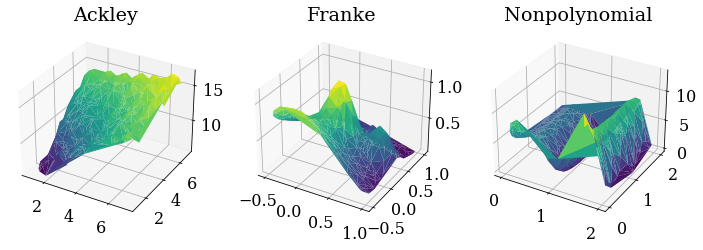

In [17]:
fig

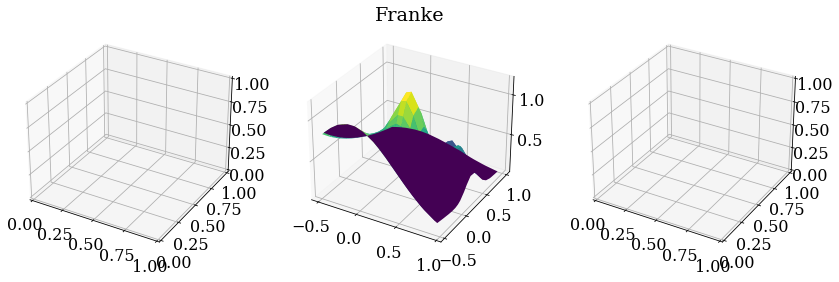

In [63]:
fig.tight_layout()
# fig.savefig('./exp/synth_2D/2D.svg')
# fig.savefig('./exp/synth_2D/2D.png', dpi=150, transparent=False, bbox_inches='tight')
fig

## Friedman 1

In [16]:
X_train = None
X_norm_train = None
y_train = None
y_train_noisy = None
X_test = None
X_norm_test = None
y_test = None 
y_test_noisy = None

In [17]:
name = 'Friedman 1'
noise = 1.5

X_train, y_train = make_friedman1(noise=0.0, random_state=18397425)
_, y_train_noisy = make_friedman1(noise=noise, random_state=18397425)
X_norm_train= normalize(X_train, axis=1)

X_test, y_test = make_friedman1(noise=0.0, random_state=30189745)
_, y_test_noisy = make_friedman1(noise=noise, random_state=30189745)
X_norm_test= normalize(X_test, axis=1)

# [X_train, y_train, X_test, y_test, X_draw, norm, noise, name]
datasets.append([X_train, y_train, X_test, y_test, X_test, False, 0.0, name])
datasets.append([X_norm_train, y_train, X_norm_test, y_test, X_test, True, 0.0, name])
datasets.append([X_train, y_train_noisy, X_test, y_test_noisy, X_test, False, 0.15, name])
datasets.append([X_norm_train, y_train_noisy, X_norm_test, y_test_noisy, X_test, True, 0.15, name])

## Friedman 2

In [18]:
X_train = None
X_norm_train = None
y_train = None
y_train_noisy = None
X_test = None
X_norm_test = None
y_test = None 
y_test_noisy = None

In [19]:
name = 'Friedman 2'
noise = 5

X_train, y_train = make_friedman2(noise=0.0, random_state=18397425)
_, y_train_noisy = make_friedman2(noise=noise, random_state=18397425)
X_norm_train= normalize(X_train, axis=1)

X_test, y_test = make_friedman2(noise=0.0, random_state=30189745)
_, y_test_noisy = make_friedman2(noise=noise, random_state=30189745)
X_norm_test= normalize(X_test, axis=1)

# [X_train, y_train, X_test, y_test, X_draw, norm, noise, name]
datasets.append([X_train, y_train, X_test, y_test, X_test, False, 0.0, name])
datasets.append([X_norm_train, y_train, X_norm_test, y_test, X_test, True, 0.0, name])
datasets.append([X_train, y_train_noisy, X_test, y_test_noisy, X_test, False, 0.15, name])
datasets.append([X_norm_train, y_train_noisy, X_norm_test, y_test_noisy, X_test, True, 0.15, name])

## Friedman 3

In [20]:
X_train = None
X_norm_train = None
y_train = None
y_train_noisy = None
X_test = None
X_norm_test = None
y_test = None 
y_test_noisy = None

In [21]:
name = 'Friedman 3'
noise = 0.15

X_train, y_train = make_friedman3(noise=0.0, random_state=18397425)
_, y_train_noisy = make_friedman3(noise=noise, random_state=18397425)
X_norm_train= normalize(X_train, axis=1)

X_test, y_test = make_friedman3(noise=0.0, random_state=30189745)
_, y_test_noisy = make_friedman3(noise=noise, random_state=30189745)
X_norm_test= normalize(X_test, axis=1)

# [X_train, y_train, X_test, y_test, X_draw, norm, noise, name]
datasets.append([X_train, y_train, X_test, y_test, X_test, False, 0.0, name])
datasets.append([X_norm_train, y_train, X_norm_test, y_test, X_test, True, 0.0, name])
datasets.append([X_train, y_train_noisy, X_test, y_test_noisy, X_test, False, 0.15, name])
datasets.append([X_norm_train, y_train_noisy, X_norm_test, y_test_noisy, X_test, True, 0.15, name])

# Results

In [17]:
len(datasets)

12

In [19]:
%%capture
experiment_outputs = []
for data in datasets:
    for depth in (2, 3, 10):
        experiment_outputs.append(experiment(data, depth, search_bound=6, norm_y=True))

In [20]:
save_data(experiment_outputs, 'exp_2d_FIXED')

In [3]:
experiment_outputs = load_data('exp_2d')

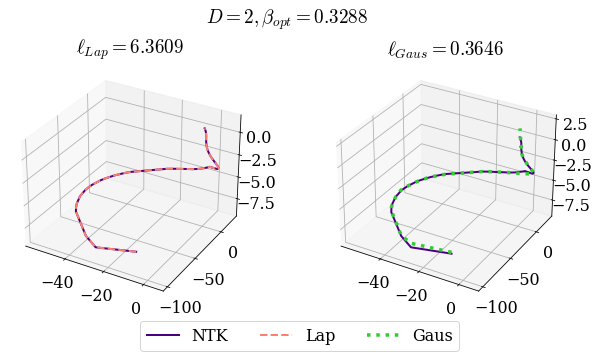

In [25]:
exp = experiment_outputs[0]
means = exp['means']
# means1 = experiment_outputs[0]['means']

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(9,5), subplot_kw={'projection': '3d'})
ax = ax.ravel()
fig.suptitle(rf"$D={exp['kernel']['depth']}, " + r'\beta_{opt}' + f"={round(exp['kernel']['bias'], 4)}$")
ax[0].plot(X_test[:,0], X_test[:,1], means[0], lw=2, color='indigo', label='NTK')
ax[0].plot(X_test[:,0], X_test[:,1], means[0], '--', lw=2, color='salmon', label='Lap')
ax[0].set_title(r"$\ell_{Lap}=" + f"{round(exp['kernel']['ell_lap'], 4)}$")
ax[1].plot(X_test[:,0], X_test[:,1], means[0], lw=2, color='indigo')
ax[1].plot(X_test[:,0], X_test[:,1], means[2], ':', lw=3.5, color='limegreen', label='Gaus')
ax[1].set_title(r"$\ell_{Gaus}=" + f"{round(exp['kernel']['ell_gaus'], 4)}$")

fig.legend(loc='lower center', ncol=3)
fig.tight_layout(rect=[0, 0.1, 1, 1])
# fig.savefig('./exp/synth_2D/parametric/D2norm.svg')
# ax[0].scatter(X_test[:,0], X_test[:,1], y_test.ravel())
# ax[1].scatter(X_test[:,0], X_test[:,1], y_test.ravel())

# angle = 180
# ax[0].view_init(30, angle)
# ax[1].view_init(30, angle)
# plt.draw()


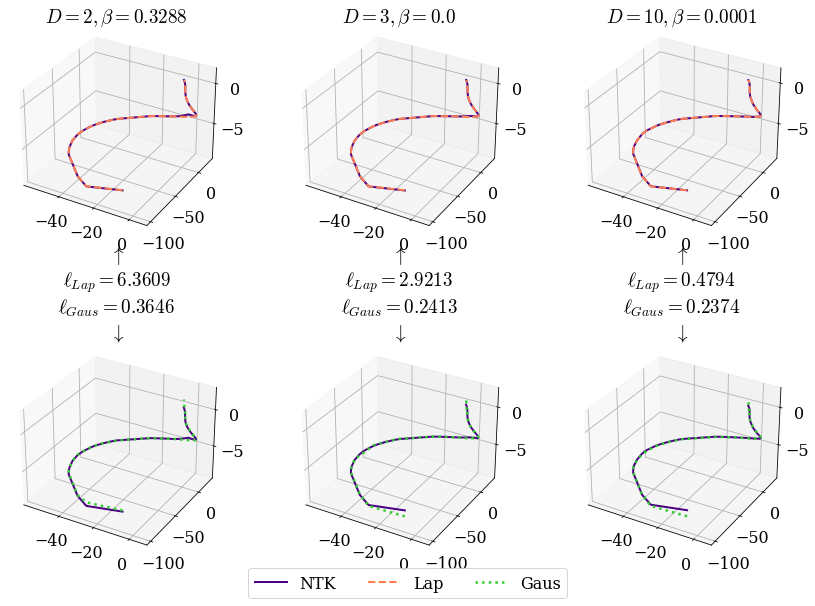

In [26]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(12,8.5), subplot_kw={'projection': '3d'})
ax = ax.ravel()

i=0
for exp in experiment_outputs[0:3]:
    means = exp['means']

    ax[i].set_title(rf"$D={exp['kernel']['depth']}, " + r'\beta' + f"={round(exp['kernel']['bias'], 4)}$",
        y=1.05)
    ax[i].plot(X_test[:,0], X_test[:,1], means[0], lw=2, color='indigo', label='NTK')
    ax[i].plot(X_test[:,0], X_test[:,1], means[1], '--', lw=2, color='coral', label='Lap')
    ax[i + 3].set_title(
        r"$\uparrow$" + "\n"
        r"$\ell_{Lap}=" + f"{round(exp['kernel']['ell_lap'], 4)}$" + "\n" 
        r"$\ell_{Gaus}=" + f"{round(exp['kernel']['ell_gaus'], 4)}$" + "\n"
        r"$\downarrow$", 
        y=1.05,
        pad=10
    )
    ax[i + 3].plot(X_test[:,0], X_test[:,1], means[0], lw=2, color='indigo')
    ax[i + 3].plot(X_test[:,0], X_test[:,1], means[2], ':', lw=2.5, color='limegreen', label='Gaus')
    i += 1
top = ax[0].get_legend_handles_labels() 
bot = ax[3].get_legend_handles_labels()
handles = top[0] + bot[0]
labels = top[1] + bot[1]
fig.legend(handles, labels, loc='lower center', ncol=3)#, bbox_to_anchor=[0.5])
fig.tight_layout(rect=[0, 0.05, 1, 1])
# fig.savefig('./exp/synth_2D/parametric/X_norm.svg')

In [24]:
print(experiment_outputs[1 + 1])

{'dataset': {'name': 'Ackley', 'norm': False, 'noise': 0.0, 'test': [array([[1.21901621, 1.0349079 ],
       [1.38707306, 1.0349079 ],
       [1.74176502, 1.0349079 ],
       [1.94298103, 1.0349079 ],
       [2.22962538, 1.0349079 ],
       [2.53676342, 1.0349079 ],
       [2.90355874, 1.0349079 ],
       [3.2183697 , 1.0349079 ],
       [3.42880378, 1.0349079 ],
       [3.85877164, 1.0349079 ],
       [4.14658781, 1.0349079 ],
       [4.3253454 , 1.0349079 ],
       [4.72647595, 1.0349079 ],
       [5.19841052, 1.0349079 ],
       [5.41739881, 1.0349079 ],
       [5.51462686, 1.0349079 ],
       [6.07541819, 1.0349079 ],
       [6.34387333, 1.0349079 ],
       [6.55986836, 1.0349079 ],
       [6.7139012 , 1.0349079 ],
       [1.21901621, 1.56613975],
       [1.38707306, 1.56613975],
       [1.74176502, 1.56613975],
       [1.94298103, 1.56613975],
       [2.22962538, 1.56613975],
       [2.53676342, 1.56613975],
       [2.90355874, 1.56613975],
       [3.2183697 , 1.56613975],
       

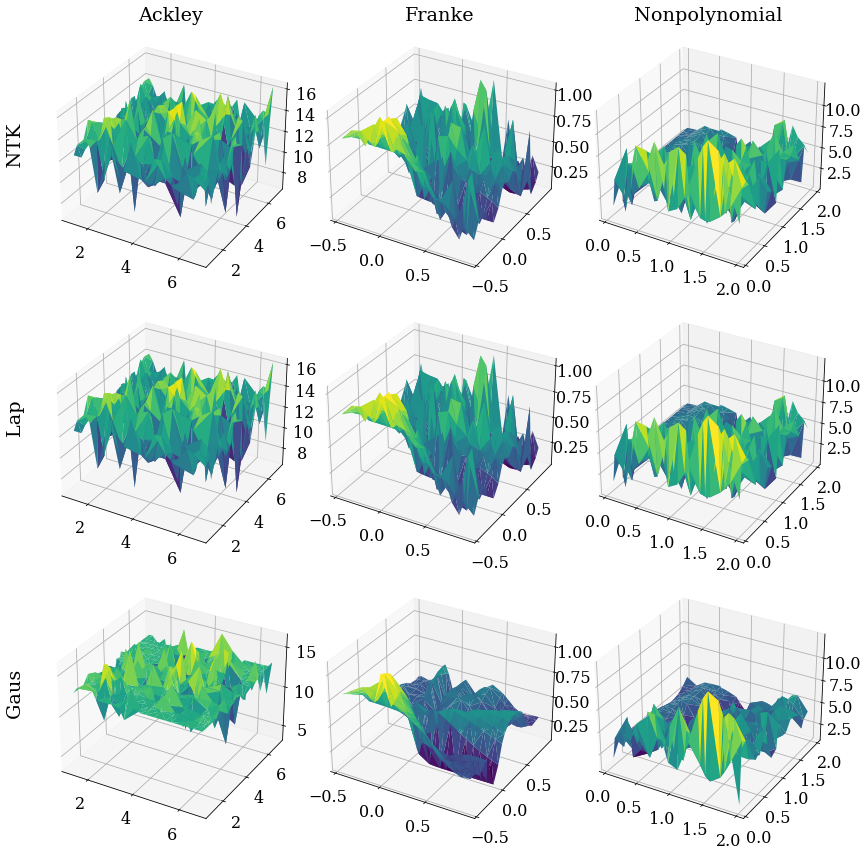

In [9]:
# Rd D=3  1, 13, 25
# Sd D=10 5, 17, 29 (+4)
# Rd, noisy (+5)
# Sd, noisy (+8)
offset = 4
i, j, k = 1 + offset, 13 + offset, 25 + offset
exps = [experiment_outputs[i], experiment_outputs[j], experiment_outputs[k]]

fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(12,12), subplot_kw={'projection': '3d'})
ax = ax.ravel()
for a in ax:
    a.patch.set_alpha(0)

for a, name in zip(ax[0:3], ['Ackley', 'Franke', 'Nonpolynomial']):
    a.set_title(name)

fig.supylabel('Gaus                                      Lap                                      NTK')

ax[0].plot_trisurf(exps[0]['dataset']['draw'][:,0], exps[0]['dataset']['draw'][:,1], exps[0]['means'][0], cmap='viridis')
ax[1].plot_trisurf(exps[1]['dataset']['draw'][:,0], exps[1]['dataset']['draw'][:,1], exps[1]['means'][0], cmap='viridis')
ax[2].plot_trisurf(exps[2]['dataset']['draw'][:,0], exps[2]['dataset']['draw'][:,1], exps[2]['means'][0], cmap='viridis')

ax[3].plot_trisurf(exps[0]['dataset']['draw'][:,0], exps[0]['dataset']['draw'][:,1], exps[0]['means'][1], cmap='viridis')
ax[4].plot_trisurf(exps[1]['dataset']['draw'][:,0], exps[1]['dataset']['draw'][:,1], exps[1]['means'][1], cmap='viridis')
ax[5].plot_trisurf(exps[2]['dataset']['draw'][:,0], exps[2]['dataset']['draw'][:,1], exps[2]['means'][1], cmap='viridis')

ax[6].plot_trisurf(exps[0]['dataset']['draw'][:,0], exps[0]['dataset']['draw'][:,1], exps[0]['means'][2], cmap='viridis')
ax[7].plot_trisurf(exps[1]['dataset']['draw'][:,0], exps[1]['dataset']['draw'][:,1], exps[1]['means'][2], cmap='viridis')
ax[8].plot_trisurf(exps[2]['dataset']['draw'][:,0], exps[2]['dataset']['draw'][:,1], exps[2]['means'][2], cmap='viridis')

# ax[0].plot_surface(exps[0]['dataset']['draw'][:,0].reshape(-1,20), exps[0]['dataset']['draw'][:,1].reshape(-1,20), exps[0]['means'][0].reshape(-1,20), cmap='viridis')
# ax[1].plot_surface(exps[1]['dataset']['draw'][:,0].reshape(-1,20), exps[1]['dataset']['draw'][:,1].reshape(-1,20), exps[1]['means'][0].reshape(-1,20), cmap='viridis')
# ax[2].plot_surface(exps[2]['dataset']['draw'][:,0].reshape(-1,20), exps[2]['dataset']['draw'][:,1].reshape(-1,20), exps[2]['means'][0].reshape(-1,20), cmap='viridis')

# ax[3].plot_surface(exps[0]['dataset']['draw'][:,0].reshape(-1,20), exps[0]['dataset']['draw'][:,1].reshape(-1,20), exps[0]['means'][1].reshape(-1,20), cmap='viridis')
# ax[4].plot_surface(exps[1]['dataset']['draw'][:,0].reshape(-1,20), exps[1]['dataset']['draw'][:,1].reshape(-1,20), exps[1]['means'][1].reshape(-1,20), cmap='viridis')
# ax[5].plot_surface(exps[2]['dataset']['draw'][:,0].reshape(-1,20), exps[2]['dataset']['draw'][:,1].reshape(-1,20), exps[2]['means'][1].reshape(-1,20), cmap='viridis')

# ax[6].plot_surface(exps[0]['dataset']['draw'][:,0].reshape(-1,20), exps[0]['dataset']['draw'][:,1].reshape(-1,20), exps[0]['means'][2].reshape(-1,20), cmap='viridis')
# ax[7].plot_surface(exps[1]['dataset']['draw'][:,0].reshape(-1,20), exps[1]['dataset']['draw'][:,1].reshape(-1,20), exps[1]['means'][2].reshape(-1,20), cmap='viridis')
# ax[8].plot_surface(exps[2]['dataset']['draw'][:,0].reshape(-1,20), exps[2]['dataset']['draw'][:,1].reshape(-1,20), exps[2]['means'][2].reshape(-1,20), cmap='viridis')

fig.tight_layout()
# fig.savefig('./exp/2D/2dSdD10.svg')

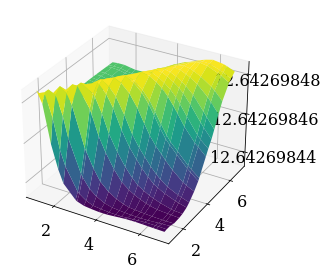

In [11]:
exps = experiment_outputs
fig, ax = plt.subplots(1,1, figsize=(4.5,4), subplot_kw={'projection': '3d'})
ax.patch.set_alpha(0)
ax.ticklabel_format(useOffset=False)

ax.plot_surface(exps[0]['dataset']['draw'][:,0].reshape(-1,20), exps[0]['dataset']['draw'][:,1].reshape(-1,20), exps[0]['means'][0].reshape(-1,20), cmap='viridis')
# ax.set_zticks([12.665799875])
# ax.set_zticklabels(["~12.67"])
fig.tight_layout()
# fig.savefig('./exp/2D/2dSdNoisyD2.svg')

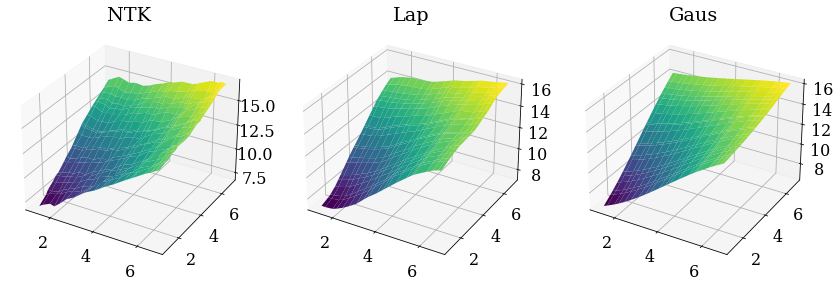

In [142]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(12,4), subplot_kw={'projection': '3d'})
ax = ax.ravel()
for a in ax:
    a.patch.set_alpha(0)

for a, name in zip(ax[0:3], ['NTK', 'Lap', 'Gaus']):
    a.set_title(name)

ax[0].plot_surface(exps[0]['dataset']['draw'][:,0].reshape(-1,20), exps[0]['dataset']['draw'][:,1].reshape(-1,20), exps[0]['means'][0].reshape(-1,20), cmap='viridis')
ax[1].plot_surface(exps[0]['dataset']['draw'][:,0].reshape(-1,20), exps[0]['dataset']['draw'][:,1].reshape(-1,20), exps[0]['means'][1].reshape(-1,20), cmap='viridis')
ax[2].plot_surface(exps[0]['dataset']['draw'][:,0].reshape(-1,20), exps[0]['dataset']['draw'][:,1].reshape(-1,20), exps[0]['means'][2].reshape(-1,20), cmap='viridis')

fig.tight_layout()
fig.savefig('./exp/2D/2dRdNoisyD2.svg')

In [17]:
experiment_outputs = load_data('./exp_2d')

In [27]:
for exp in experiment_outputs:
    depth = exp['kernel']['depth']
    name = exp['dataset']['name']
    noise = exp['dataset']['noise']

    if noise==0.0: 
        noisy = False 
    else: 
        noisy = True

    if name == 'Nonpolynomial':
        name = 'Nonpoly'

    if exp['dataset']['norm']:
        df_lap_sd[f'D{depth}rmse'][name, noisy]  = exp['lap']['pred_rmse']
        df_lap_sd[f'D{depth}corr'][name, noisy]  = exp['lap']['pred_corr']
        df_gaus_sd[f'D{depth}rmse'][name, noisy] = exp['gaus']['pred_rmse']
        df_gaus_sd[f'D{depth}corr'][name, noisy] = exp['gaus']['pred_corr']
    else:
        df_lap_rd[f'D{depth}rmse'][name, noisy]  = exp['lap']['pred_rmse']
        df_lap_rd[f'D{depth}corr'][name, noisy]  = exp['lap']['pred_corr']
        df_gaus_rd[f'D{depth}rmse'][name, noisy] = exp['gaus']['pred_rmse']
        df_gaus_rd[f'D{depth}corr'][name, noisy] = exp['gaus']['pred_corr']

In [17]:
df_lap_rd

D2rmse D3rmse D10rmse D2corr D3corr D10corr
Dataset    Noise                                            
Parametric False    NaN    NaN     NaN    NaN    NaN     NaN
           True     NaN    NaN     NaN    NaN    NaN     NaN

In [29]:
df_lap_sd

D2rmse    D3rmse   D10rmse    D2corr    D3corr   D10corr
Dataset    Noise                                                            
Parametric False  0.070991  0.029234  0.006514  0.999767   0.99996  0.999999
           True   0.168012  0.083927  0.075688  0.998782  0.999715  0.999756

In [28]:
df_gaus_rd

D2rmse D3rmse D10rmse D2corr D3corr D10corr
Dataset    Noise                                            
Parametric False    NaN    NaN     NaN    NaN    NaN     NaN
           True     NaN    NaN     NaN    NaN    NaN     NaN

In [30]:
df_gaus_sd

D2rmse    D3rmse   D10rmse    D2corr    D3corr   D10corr
Dataset    Noise                                                            
Parametric False  0.195563  0.178298  0.179243  0.998191  0.998451  0.998514
           True   0.260636  0.225394   0.22351  0.996274  0.997166  0.997129

In [20]:
print(df_lap_sd.style.to_latex())

\begin{tabular}{llllllll}
 &  & D2rmse & D3rmse & D10rmse & D2corr & D3corr & D10corr \\
Dataset & Noise &  &  &  &  &  &  \\
\multirow[c]{2}{*}{Ackley} & 0 & 0.000007 & 0.000033 & 0.000106 & 1.000000 & 1.000000 & 1.000000 \\
 & 1 & 0.000000 & 0.000000 & 0.000000 & 0.961572 & 0.989006 & 0.997353 \\
\multirow[c]{2}{*}{Franke} & 0 & 0.012253 & 0.003677 & 0.000981 & 0.998723 & 0.999885 & 0.999992 \\
 & 1 & 0.006262 & 0.003540 & 0.003754 & 0.999330 & 0.999794 & 0.999932 \\
\multirow[c]{2}{*}{Nonpoly} & 0 & 0.000006 & 0.000021 & 0.000094 & 1.000000 & 1.000000 & 1.000000 \\
 & 1 & 0.027830 & 0.017961 & 0.016916 & 0.999766 & 0.999906 & 0.999933 \\
\end{tabular}



In [21]:
print(df_gaus_sd.style.to_latex())

\begin{tabular}{llllllll}
 &  & D2rmse & D3rmse & D10rmse & D2corr & D3corr & D10corr \\
Dataset & Noise &  &  &  &  &  &  \\
\multirow[c]{2}{*}{Ackley} & 0 & 1.398742 & 1.398725 & 1.398518 & 0.651686 & 0.651690 & 0.651745 \\
 & 1 & 0.000000 & 0.000000 & 0.000000 & 0.803216 & 0.779842 & 0.852059 \\
\multirow[c]{2}{*}{Franke} & 0 & 0.146596 & 0.146731 & 0.146946 & 0.797024 & 0.796642 & 0.795084 \\
 & 1 & 0.016028 & 0.014063 & 0.015654 & 0.994961 & 0.996075 & 0.995106 \\
\multirow[c]{2}{*}{Nonpoly} & 0 & 1.694472 & 1.509627 & 1.564493 & 0.673630 & 0.753305 & 0.731713 \\
 & 1 & 0.166683 & 0.158318 & 0.128541 & 0.987764 & 0.990458 & 0.993693 \\
\end{tabular}



In [73]:
print(df_lap_rd.style.to_latex())

\begin{tabular}{llllllll}
 &  & D2rmse & D3rmse & D10rmse & D2corr & D3corr & D10corr \\
Dataset & Noise &  &  &  &  &  &  \\
\multirow[c]{2}{*}{Ackley} & 0 & 0.566218 & 0.566277 & 0.566758 & 0.968227 & 0.968224 & 0.968216 \\
 & 1 & 0.281244 & 0.285291 & 0.310488 & 0.992085 & 0.991823 & 0.990234 \\
\multirow[c]{2}{*}{Franke} & 0 & 0.088882 & 0.088772 & 0.088494 & 0.940756 & 0.940750 & 0.940900 \\
 & 1 & 0.044030 & 0.045479 & 0.051769 & 0.982889 & 0.981696 & 0.975929 \\
\multirow[c]{2}{*}{Nonpoly} & 0 & 2.314064 & 2.313065 & 2.311921 & 0.505646 & 0.507796 & 0.508031 \\
 & 1 & 0.706156 & 0.710091 & 0.727823 & 0.817367 & 0.814590 & 0.800289 \\
\end{tabular}



In [74]:
print(df_gaus_rd.style.to_latex())

\begin{tabular}{llllllll}
 &  & D2rmse & D3rmse & D10rmse & D2corr & D3corr & D10corr \\
Dataset & Noise &  &  &  &  &  &  \\
\multirow[c]{2}{*}{Ackley} & 0 & 0.570324 & 0.570401 & 0.570898 & 0.967861 & 0.967856 & 0.967832 \\
 & 1 & 0.283031 & 0.287957 & 0.316046 & 0.992070 & 0.991779 & 0.990093 \\
\multirow[c]{2}{*}{Franke} & 0 & 0.094050 & 0.093873 & 0.093621 & 0.933230 & 0.933325 & 0.933448 \\
 & 1 & 0.049734 & 0.051311 & 0.057672 & 0.978974 & 0.977554 & 0.971045 \\
\multirow[c]{2}{*}{Nonpoly} & 0 & 2.353875 & 2.353772 & 2.354514 & 0.478440 & 0.478511 & 0.479017 \\
 & 1 & 0.671364 & 0.678543 & 0.708070 & 0.834612 & 0.830603 & 0.811786 \\
\end{tabular}



In [42]:
save_data(experiment_outputs, './synth')